In [3]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
import string
import numpy as np

a) Read the csv file in python Pandas DataFrame and make 70% as training
and 30% as test sets.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Reading CSV file in pandas DataFrame
data = pd.read_csv("movie_data.csv")

# Splitting the dataset into train and test sets
x_train, x_test,y_train, y_test = train_test_split(data.review, data.sentiment, test_size=0.3, random_state=42)

b) Perform the necessary pre-text processing (similar to previous questions) for
vocabulary generation.

In [4]:
# Call function in number 2
# train
def preprocess_txt(train_data):
    # Convert to lowercase
    train_data = [i.lower() for i in train_data]

    # Remove numbers
    train_data = [re.sub(r'\d+', '', data) for data in train_data]

    # Punctuation Removal
    string.punctuation
    train_data = ["".join([i for i in tok if i not in string.punctuation]) for tok in train_data]

    # Tokenization
    tokens = [word_tokenize(wd) for wd in train_data]

    # Stop Word Removal
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [[token for token in stp if token not in stop_words] for stp in tokens]

    # Perform Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [[stemmer.stem(token) for token in orieja]for orieja in tokens]
    lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in bulaba] for bulaba in tokens]
    preprocessed_txt = [' ' .join(lem) for lem in lemmatized_tokens]
    return preprocessed_txt

In [5]:
data.head(5)

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [6]:
import nltk
nltk.download('punkt')

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
x_train= preprocess_txt(x_train)
x_test = preprocess_txt(x_test)

c) Represent the text using TF-IDF feature weighting (e.g., using
TfidfVectorizer)


In [8]:
# c
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=800)

# fit and transform the training data
train_features = vectorizer.fit_transform(x_train)
train_features= train_features.toarray()
# transform the test data
test_features = vectorizer.transform(x_test)
test_features= test_features.toarray()

d) Show the IDF scores only of the first 50 keywords in your vocabulary.

In [9]:
# # get the IDF scores of the first 50 keywords
print("IDF scores of first 50 keywords\n",vectorizer.idf_[:50])

IDF scores of first 50 keywords
 [4.07048439 3.89268866 4.86871845 4.33704464 3.92091845 2.57465106
 3.36783813 2.62023858 4.03837015 4.63225768 2.99240159 4.16401045
 4.67078748 4.22319932 4.30461791 4.86871845 5.18273607 3.24165296
 4.37890549 3.72726159 4.05824434 2.37484619 3.47187798 3.26010167
 4.17899711 4.73809827 3.67450585 4.54246041 4.76733299 4.96786636
 4.93517399 4.43404435 2.94934451 3.38475381 3.29890626 4.27019769
 4.46006645 4.48585057 4.42522595 3.13976622 4.16198411 4.55238112
 4.70969399 3.89011466 4.41041086 3.53364539 4.71203044 4.58172061
 3.37610644 3.90461517]


e) Perform K-NN classification: Fit and test the model for different values for K(from 1 to 9) using a for loop and record and plot the KNN’s testing accuracy in a variable (scores).

In [10]:
# eee
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, y_train)
    y_pred = knn.predict(test_features)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f'K={k}: {score:.4f}')


K=1: 0.5250
K=2: 0.5119
K=3: 0.6687
K=4: 0.6399
K=5: 0.7023
K=6: 0.6829
K=7: 0.7235
K=8: 0.7066
K=9: 0.7335


In [11]:
k=range(1,10)

Text(0, 0.5, 'Testing Accuracy')

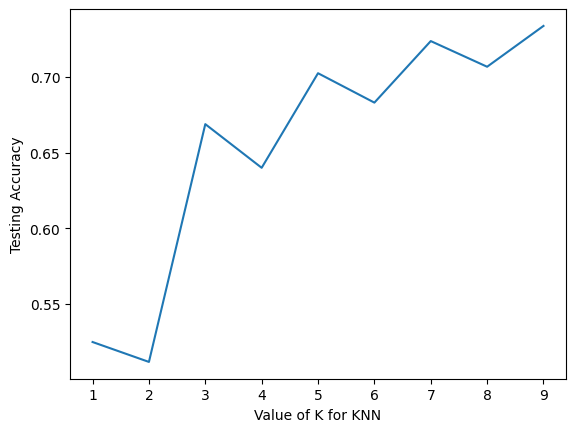

In [12]:
# Plot accuracy scores
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

f) Train the dataset using Random Forest, Logistic Regression and Deep
Neural Network (two hidden layers) using Keras sequential model with three
hidden layers. You may use all other parameters as default ones.

In [13]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(train_features, y_train)
# predict
y_pred_rf = rf_clf.predict(test_features)


# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(train_features, y_train)
logreg_acc = logreg.score(test_features, y_test)

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [15]:
# Deep Neural Network
# Building the Model
# define the model
model = tf.keras.Sequential()

# add the input layer
model.add(tf.keras.layers.Dense(784, activation='relu', input_shape=(train_features.shape[1],)))

# add the first hidden layer
model.add(tf.keras.layers.Dense(256, activation='relu'))

# add the second hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

# add the third hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))

# add the output layer
model.add(tf.keras.layers.Dense(1, activation='softmax'))

In [16]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Training the Model

# define the batch size and number of epochs
batch_size = 32
epochs = 10

# fit the model
history = model.fit(train_features, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1094/1094 [==============================] - 19s 16ms/step - loss: 0.3670 - accuracy: 0.4984
Epoch 2/10
1094/1094 [==============================] - 16s 15ms/step - loss: 0.3019 - accuracy: 0.4984
Epoch 3/10
1094/1094 [==============================] - 16s 15ms/step - loss: 0.1800 - accuracy: 0.4984
Epoch 4/10
1094/1094 [==============================] - 16s 14ms/step - loss: 0.0439 - accuracy: 0.4984
Epoch 5/10
1094/1094 [==============================] - 17s 16ms/step - loss: 0.0198 - accuracy: 0.4984
Epoch 6/10
1094/1094 [==============================] - 17s 15ms/step - loss: 0.0173 - accuracy: 0.4984
Epoch 7/10
1094/1094 [==============================] - 16s 15ms/step - loss: 0.0122 - accuracy: 0.4984
Epoch 8/10
1094/1094 [==============================] - 16s 15ms/step - loss: 0.0129 - accuracy: 0.4984
Epoch 9/10
1094/1094 [==============================] - 17s 16ms/step - loss: 0.0119 - accuracy: 0.4984
Epoch 10/10
1094/1094 [==============================] - 16s 15m

In [18]:
# Evaluate the performance of the neural network model
model_acc = model.evaluate(test_features, y_test)

469/469 [==============================] - 2s 5ms/step - loss: 1.1291 - accuracy: 0.5038


g) In the test set, compare the performances of different classifiers and show the confusion matrices.

Random Forest Test Accuracy: 0.8194
Random Forest Confusion Matrix: [[6154 1289]
 [1420 6137]]


Text(0.5, 23.52222222222222, 'Truth value')

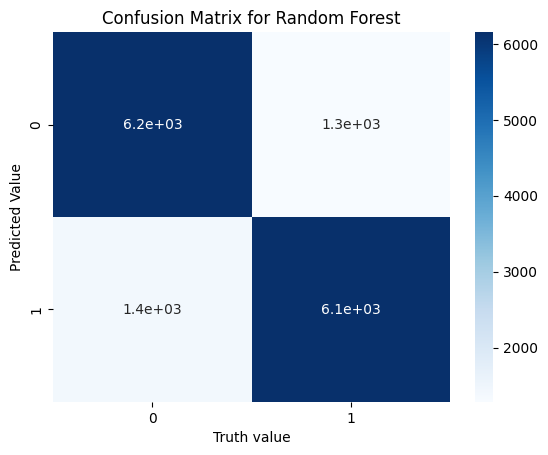

In [19]:
import seaborn as sn

# Random Forest Accuracy
print("Random Forest Test Accuracy: {}".format(accuracy_score(y_test, y_pred_rf)))
# print("Random Forest Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred_rf)))

# Confusion Matrix for Random Forest
Cnfmtx_rndfrst = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:",Cnfmtx_rndfrst )

# Heat Map representing the confusion Matrix
sn.heatmap(Cnfmtx_rndfrst, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Predicted Value')
plt.xlabel('Truth value')

Logistic Regression accuracy: 0.8542666666666666
Confusion Matrix for Logistic Regression [[6277 1166]
 [1020 6537]]


Text(0.5, 23.52222222222222, 'Truth value')

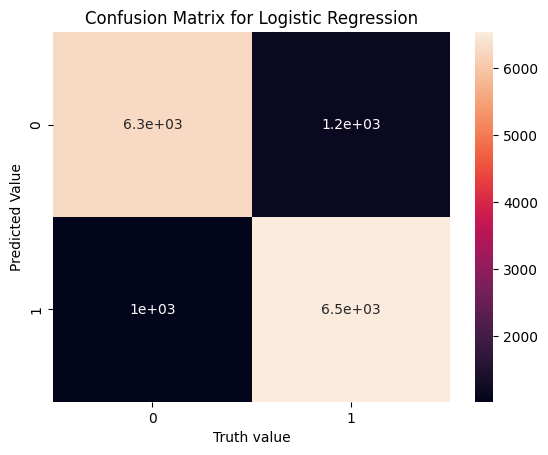

In [20]:
# Logistic Regression
print("Logistic Regression accuracy:", logreg_acc)

# Confusion Matrix for Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg.predict(test_features))
print("Confusion Matrix for Logistic Regression", logreg_cm)

sn.heatmap(logreg_cm, annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Predicted Value')
plt.xlabel('Truth value')

Deep Neural Network Accuracy: 0.5037999749183655
469/469 [==============================] - 3s 6ms/step
Random Forest Confusion Matrix: [[7443    0]
 [7557    0]]


Text(0.5, 23.52222222222222, 'Truth value')

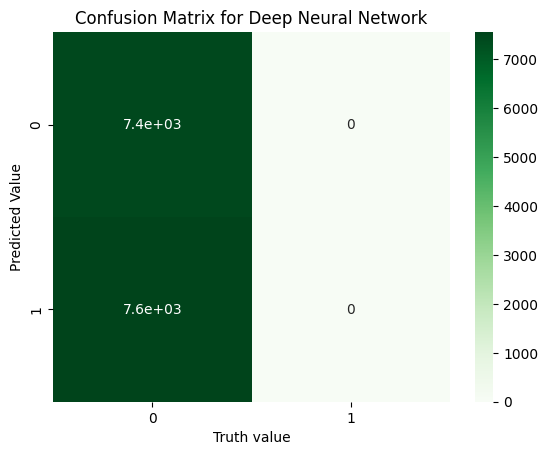

In [21]:
# DNN
print("Deep Neural Network Accuracy:", model_acc[1])
dnn_pred = model.predict(test_features)
dnn_pred =np.argmax(dnn_pred, axis=1)
# Confusion Matrix for Deep Neural Network
dnn_cm = confusion_matrix(y_test, dnn_pred)
print("Random Forest Confusion Matrix:",dnn_cm )

# Heat Map representing the confusion Matrix
sn.heatmap(dnn_cm, annot=True, cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Deep Neural Network')
plt.ylabel('Predicted Value')
plt.xlabel('Truth value')